## More on classes
- Getters and setters
- information hiding
- class variables
- Introduction to inheritance

## Defining a class vs Instantiating it
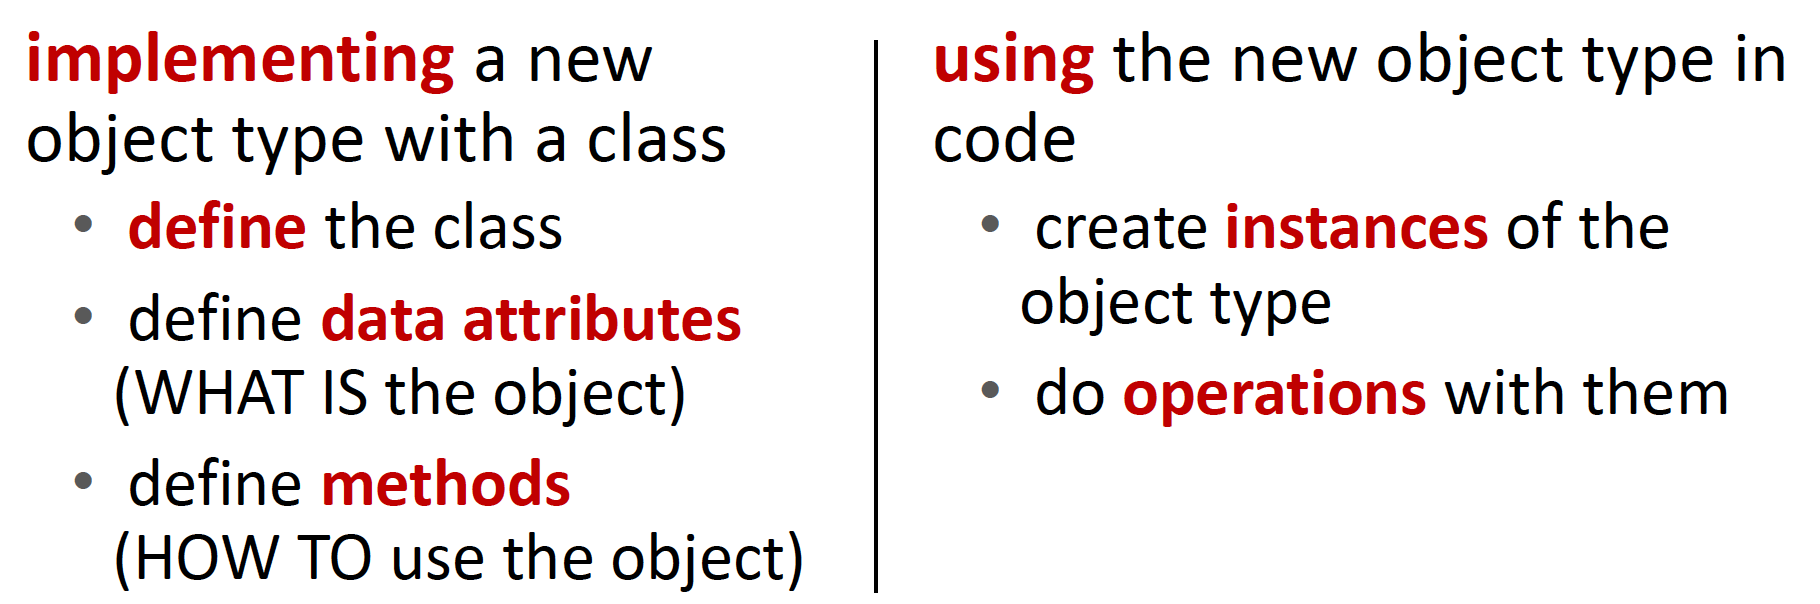

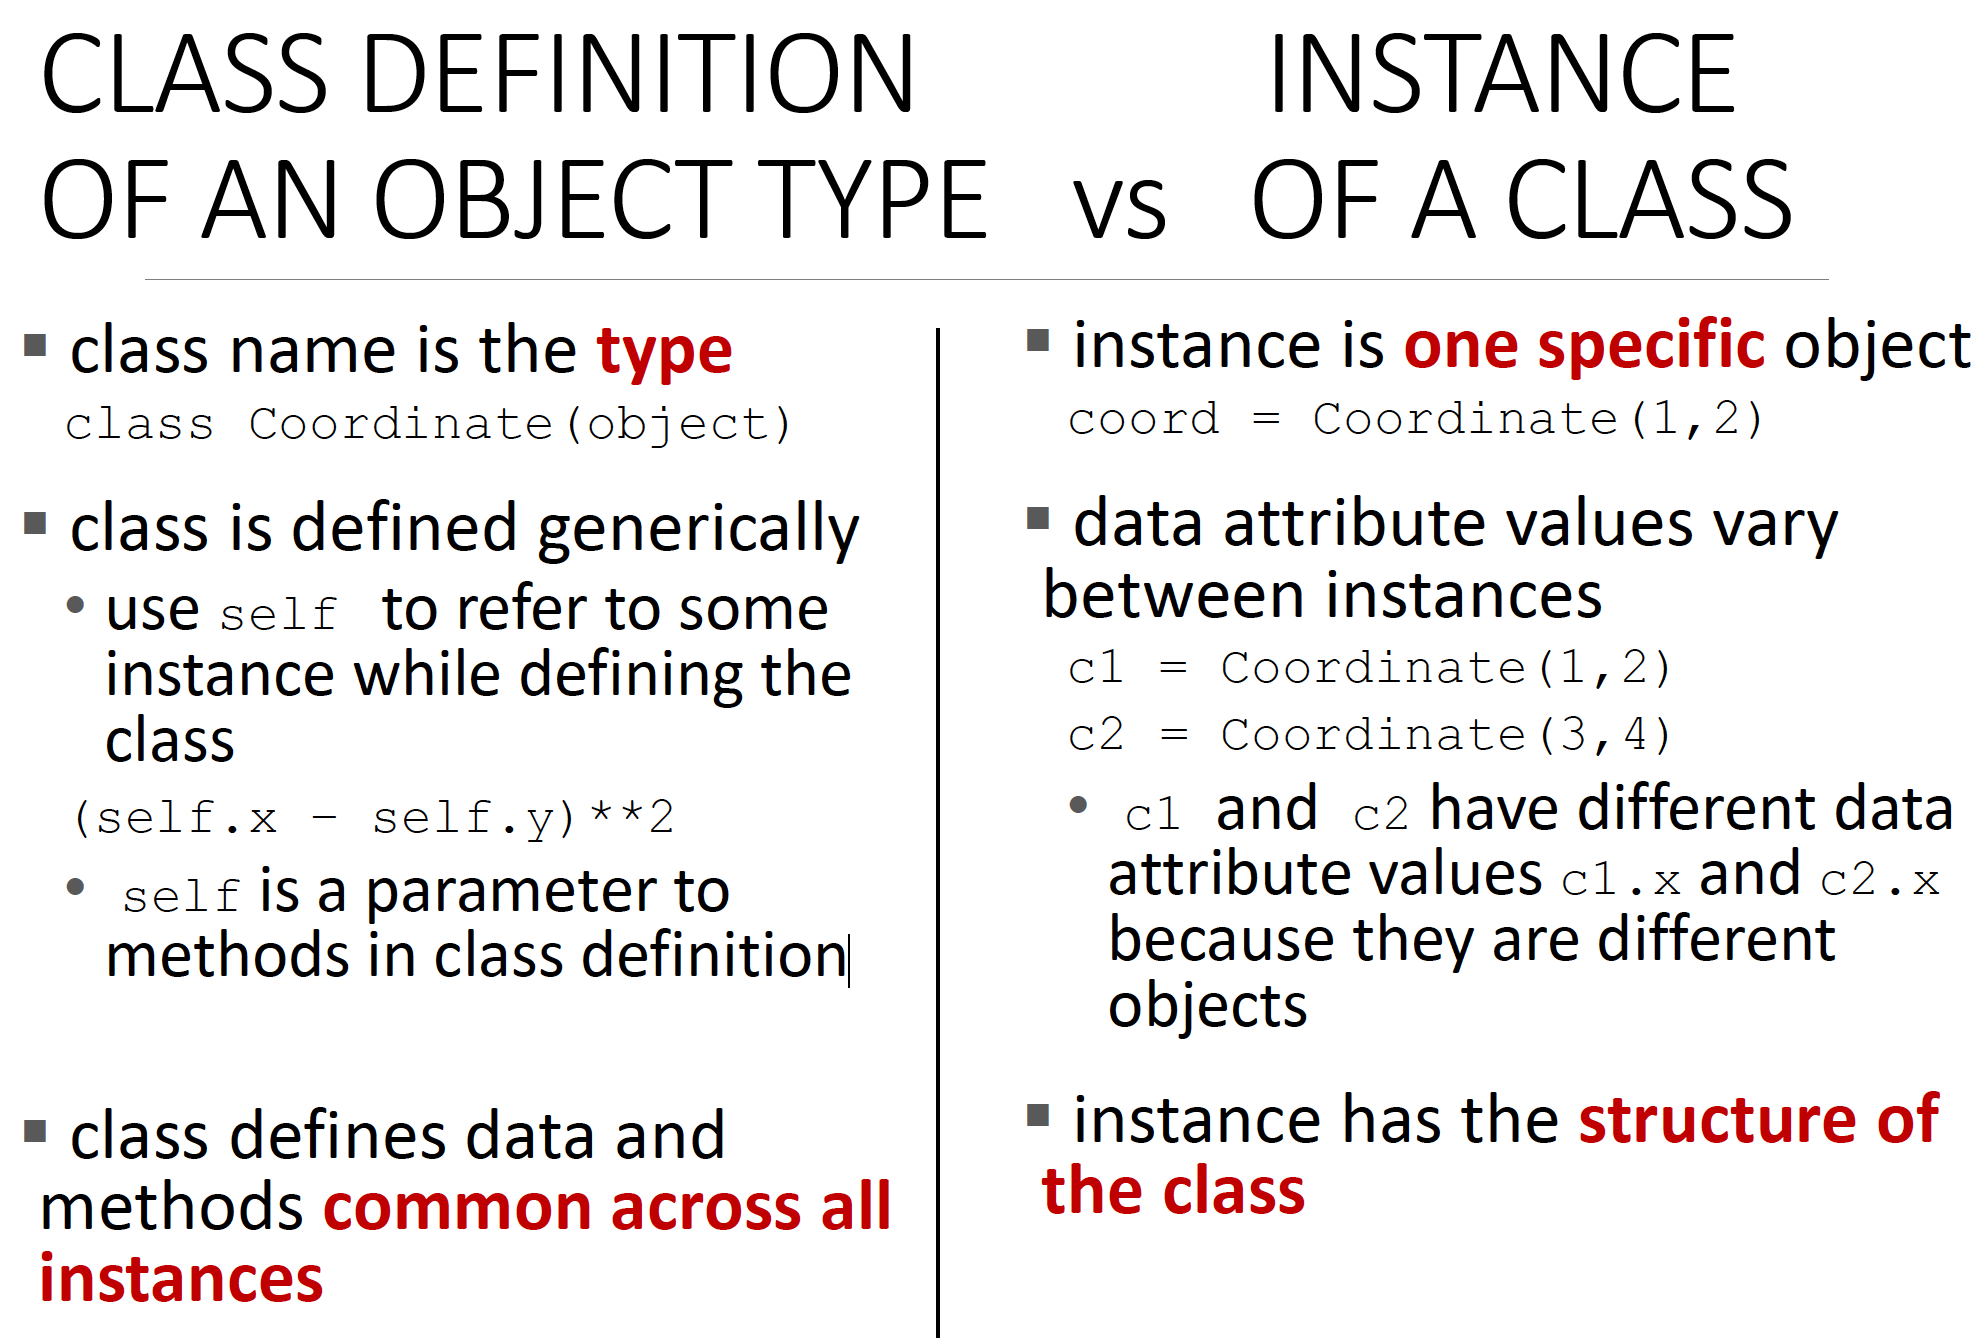

## Paradigms of programming languages
- Procedural
- OOP
- Functional 
- Imperative vs declarative 
- Low vs high 

## Why use OOP in Software Development?
- to use abstractions that are familiar to real life
- to group different objects that are of the same type
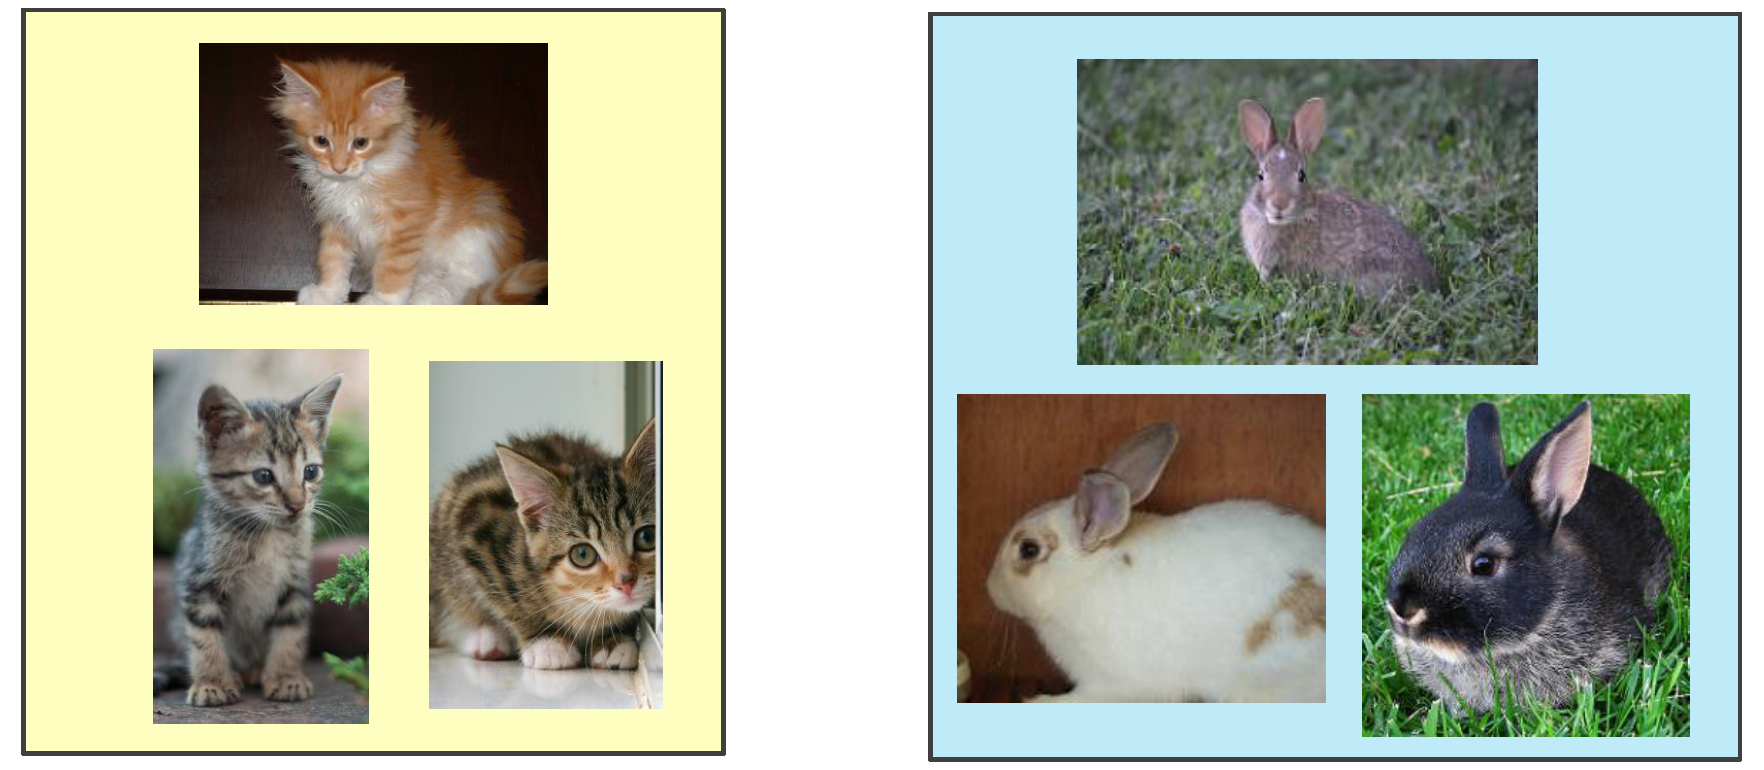

## Recap - How to define a class
Suppose we would like to define a class Animal:
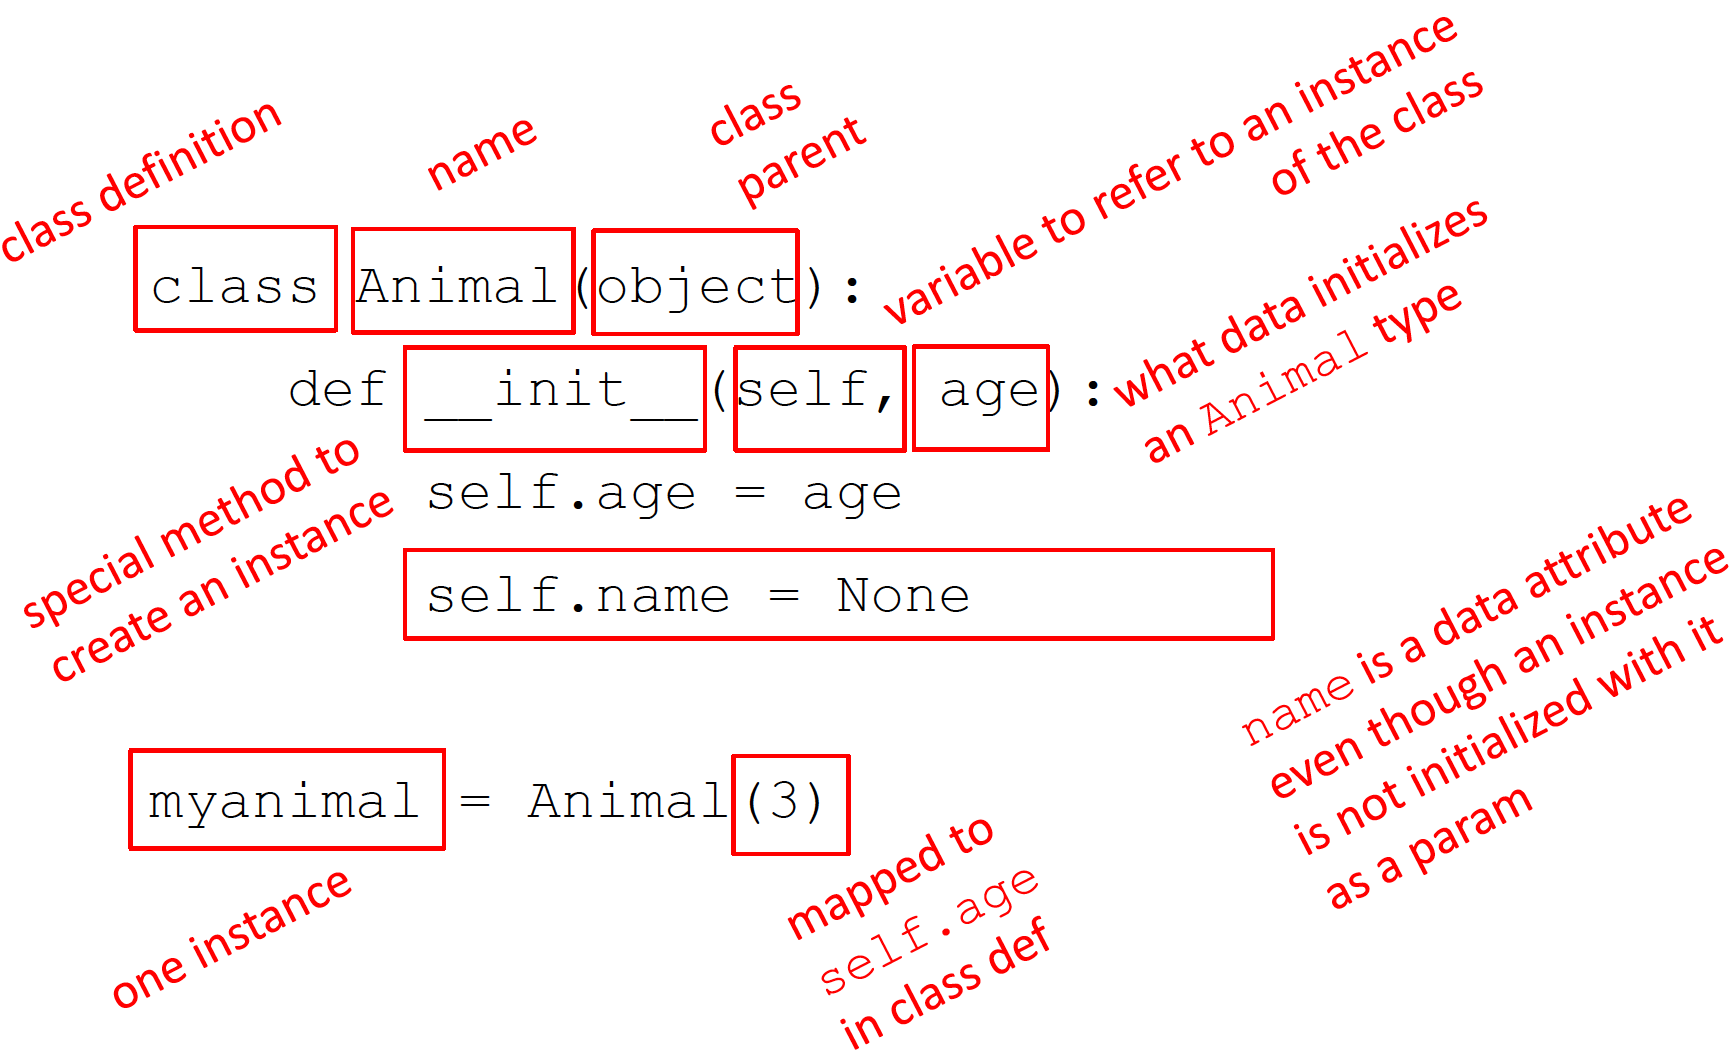

## Getter and Setter methods
Consider the Animal class below:

In [1]:
class Animal:
    __slots__ = ['age', 'name']
    def __init__(self, age):
        self.__age = age
        self.__name = None
    def get_age(self):
        return self.age
    def get_name(self):
        return self.name
    def set_age(self, newage):
        self.age = newage
    def set_name(self, newname=""):
        self.name = newname
    def __str__(self):
        return "animal:"+str(self.name)+":"+str(self.age)

In [5]:
a = Animal(5)
print(a.get_age())
a.pi = 3.14
dir(a)

5


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'get_age',
 'get_name',
 'name',
 'pi',
 'set_age',
 'set_name']

In [5]:
a.set_age(30)
print(a.get_age())

30


In [2]:
a = 10
n = "John"
val = str(a)+n
print(val)

10John


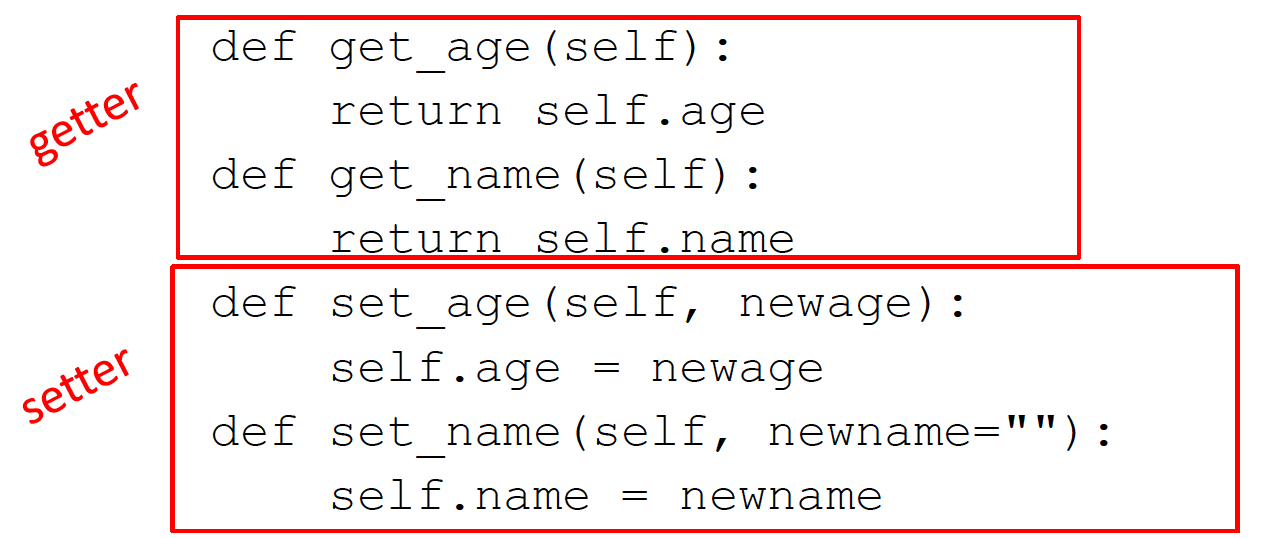<b>Getters and setters are defined for use outside the class to access the attributes </b>


### Creating an instance of Animal
- dot notation used to access attributes (data and methods) though it is better to use getters and setters to access data attributes

In [7]:
b = Animal(3)
b.set_name("John")
print(b.get_name())
# why None?

John


In [17]:
# This is allowed, but not recommended
a.age


3

In [18]:
a.age = 20
a.age

20

In [19]:
# This is recommended
a.get_age()

20

In [8]:
print("---- animal tests ----")
b = Animal(4)
#a.set_name("Swimmer")
print(b)
print(b.get_age())
b.set_name("fluffy") # set methods also called mutators 
print(b)
b.set_name("test")
print(b)

---- animal tests ----
animal:None:4
4
animal:fluffy:4
animal:test:4


## Information hiding
- Author of class definition may change data attribute variable names
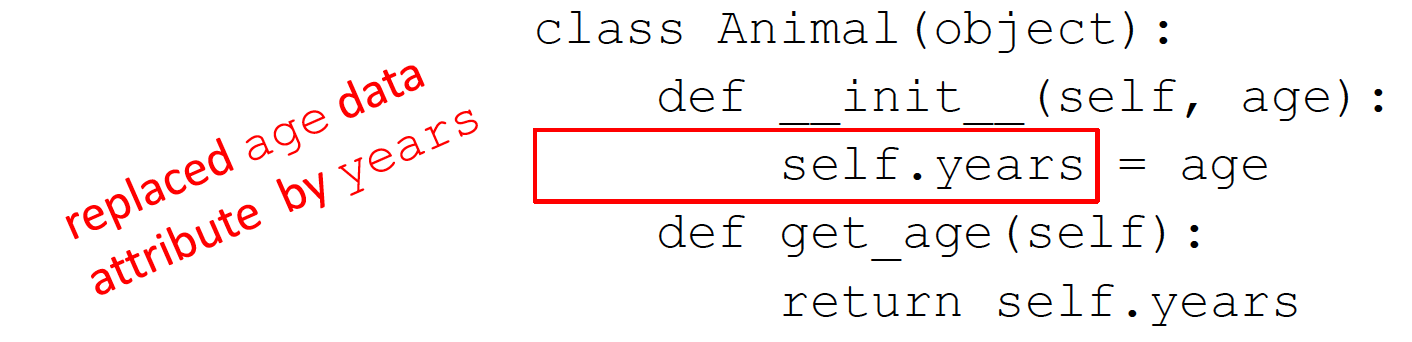
- hence, if you are accessing data attributes outside the class and class definition changes, errors will occur
- outside the class, use getters and setters because:
    - good style
    - easy to maintain code
    - prevents bugs

<b>Python is not very strong at information hiding</b>
- it allows you to access data from outside class definition <b>print(a.age)</b>
- allows you to write to data from outside class definition <b>a.age= 'infinite'</b>
- allows you to create data attributes for an instance from outside class definition <b>a.size= "tiny"</b>
- it’s not good style to do any of these!

In [13]:
a.age = 10

print(a.age)

10


In [14]:
a.age = 'hakuna matata'
print(a.age)

hakuna matata


## Hiding instance variables from access outside the class
We use double underscore as follows:

In [9]:
class Plant:
    k = 0
    def __init__(self, h): # formal parameter height
        print("inside the constructor")
        self.__height = h # h is a private field

    def show(self): # decorators
        return self.__height

    def showMsg(self, msg):
        print(msg + ':', self.show())

In [11]:
ss = Plant(6) # actual parameter "Fig tree"
#ss.show()
ss.showMsg("Hello")

inside the constructor
Hello: 6


In [13]:
print(ss.__h) ## won't work
#ss.h = 3
#print(ss.__h)


AttributeError: 'Plant' object has no attribute '__h'

## Inheritance 
Consider the following diagram:
    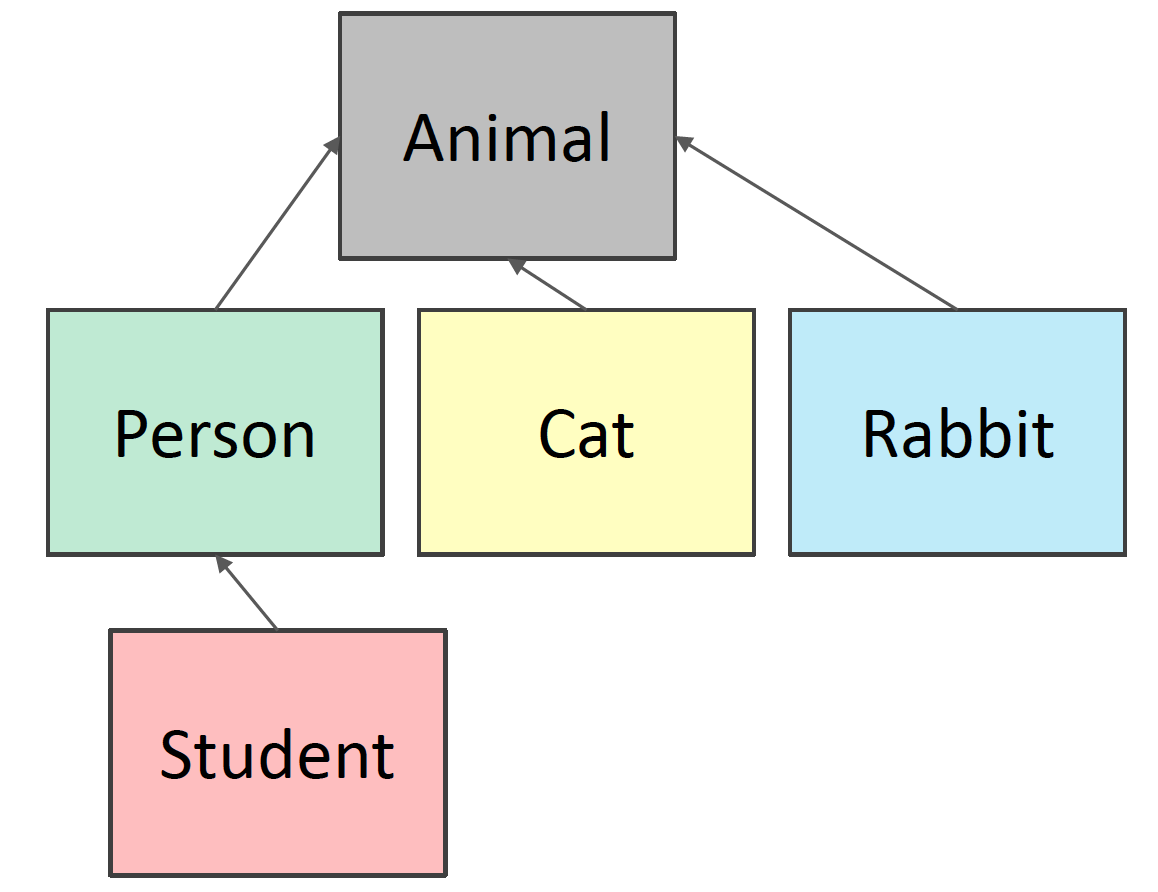
 - Animal - parent class (super class)
 - Person, Cat, and Rabbit are child classes of Animal - they inherit Animal (public) data variables and methods
 - Child classes cannot be exactly the same as parent class, it would be no use to have inheritance relationship

In [ ]:
# UML - Unified Modelling Language
# Set of notations - use cases, class, 
# Tool - Visual Paradigm 
# StarUML

In [14]:
class Animal:
    def __init__(self, age):
        self.age = age
        self.name = None
    def get_age(self):
        return self.age
    def get_name(self):
        return self.name
    def set_age(self, newage):
        self.age = newage
    def set_name(self, newname=""):
        self.name = newname
    def __str__(self):
        return "animal:"+str(self.name)+":"+str(self.age)

In [15]:
class Cat(Animal):
    def speak(self): # specific to cat, not in Animal
        print("meow")
    def __str__(self):
        return "cat:"+str(self.name)+":"+str(self.age)

# init not provided in Cat; using Animal version
# but overriding __str__

In [17]:
print("---- cat tests ----")
c = Cat(5)
c.set_name("I am a cat")
print(c)
c.speak()
print(c.get_age())

---- cat tests ----
cat:I am a cat:5
meow
5


In [18]:
b = Animal(10)
b.speak() # why is this problematic?

AttributeError: 'Animal' object has no attribute 'speak'

## Which method to call?
- subclass can have methods with same name as superclass
- look for a method name in current class definition
- if not found, look for method name up the hierarchy (in parent, then grandparent, and so on)
- use first method up the hierarchy that you found with that method name

In [19]:
class P:
    pass

class Person(Animal):
    # Person constructor 
    def __init__(self, name, age):
        Animal.__init__(self, age) # calling __init_ in Animal
        self.set_name(name)# where is this set_name() from?
        self.friends= []
        
    def get_friends(self):
        return self.friends
    def add_friend(self, fname):
        if fname not in self.friends:
            self.friends.append(fname)
    def speak(self):
        print("hello")
    def age_diff(self, other):
        diff = self.age-other.age
        print(abs(diff), "year difference")
    def __str__(self):
        return "person:"+str(self.name)+":"+str(self.age)

In [23]:
a = 10
b = 21
diff = a-b
#print(abs(diff))

# create 2 person objects
p1 = Person("Turing", 50) 
p2 = Person("Lovelace", 45)
p1.speak()
p1.age_diff(p2)
p1.get_name()

hello
5 year difference


'Turing'

In [ ]:
# Google Colab

What really is happening with Person class:
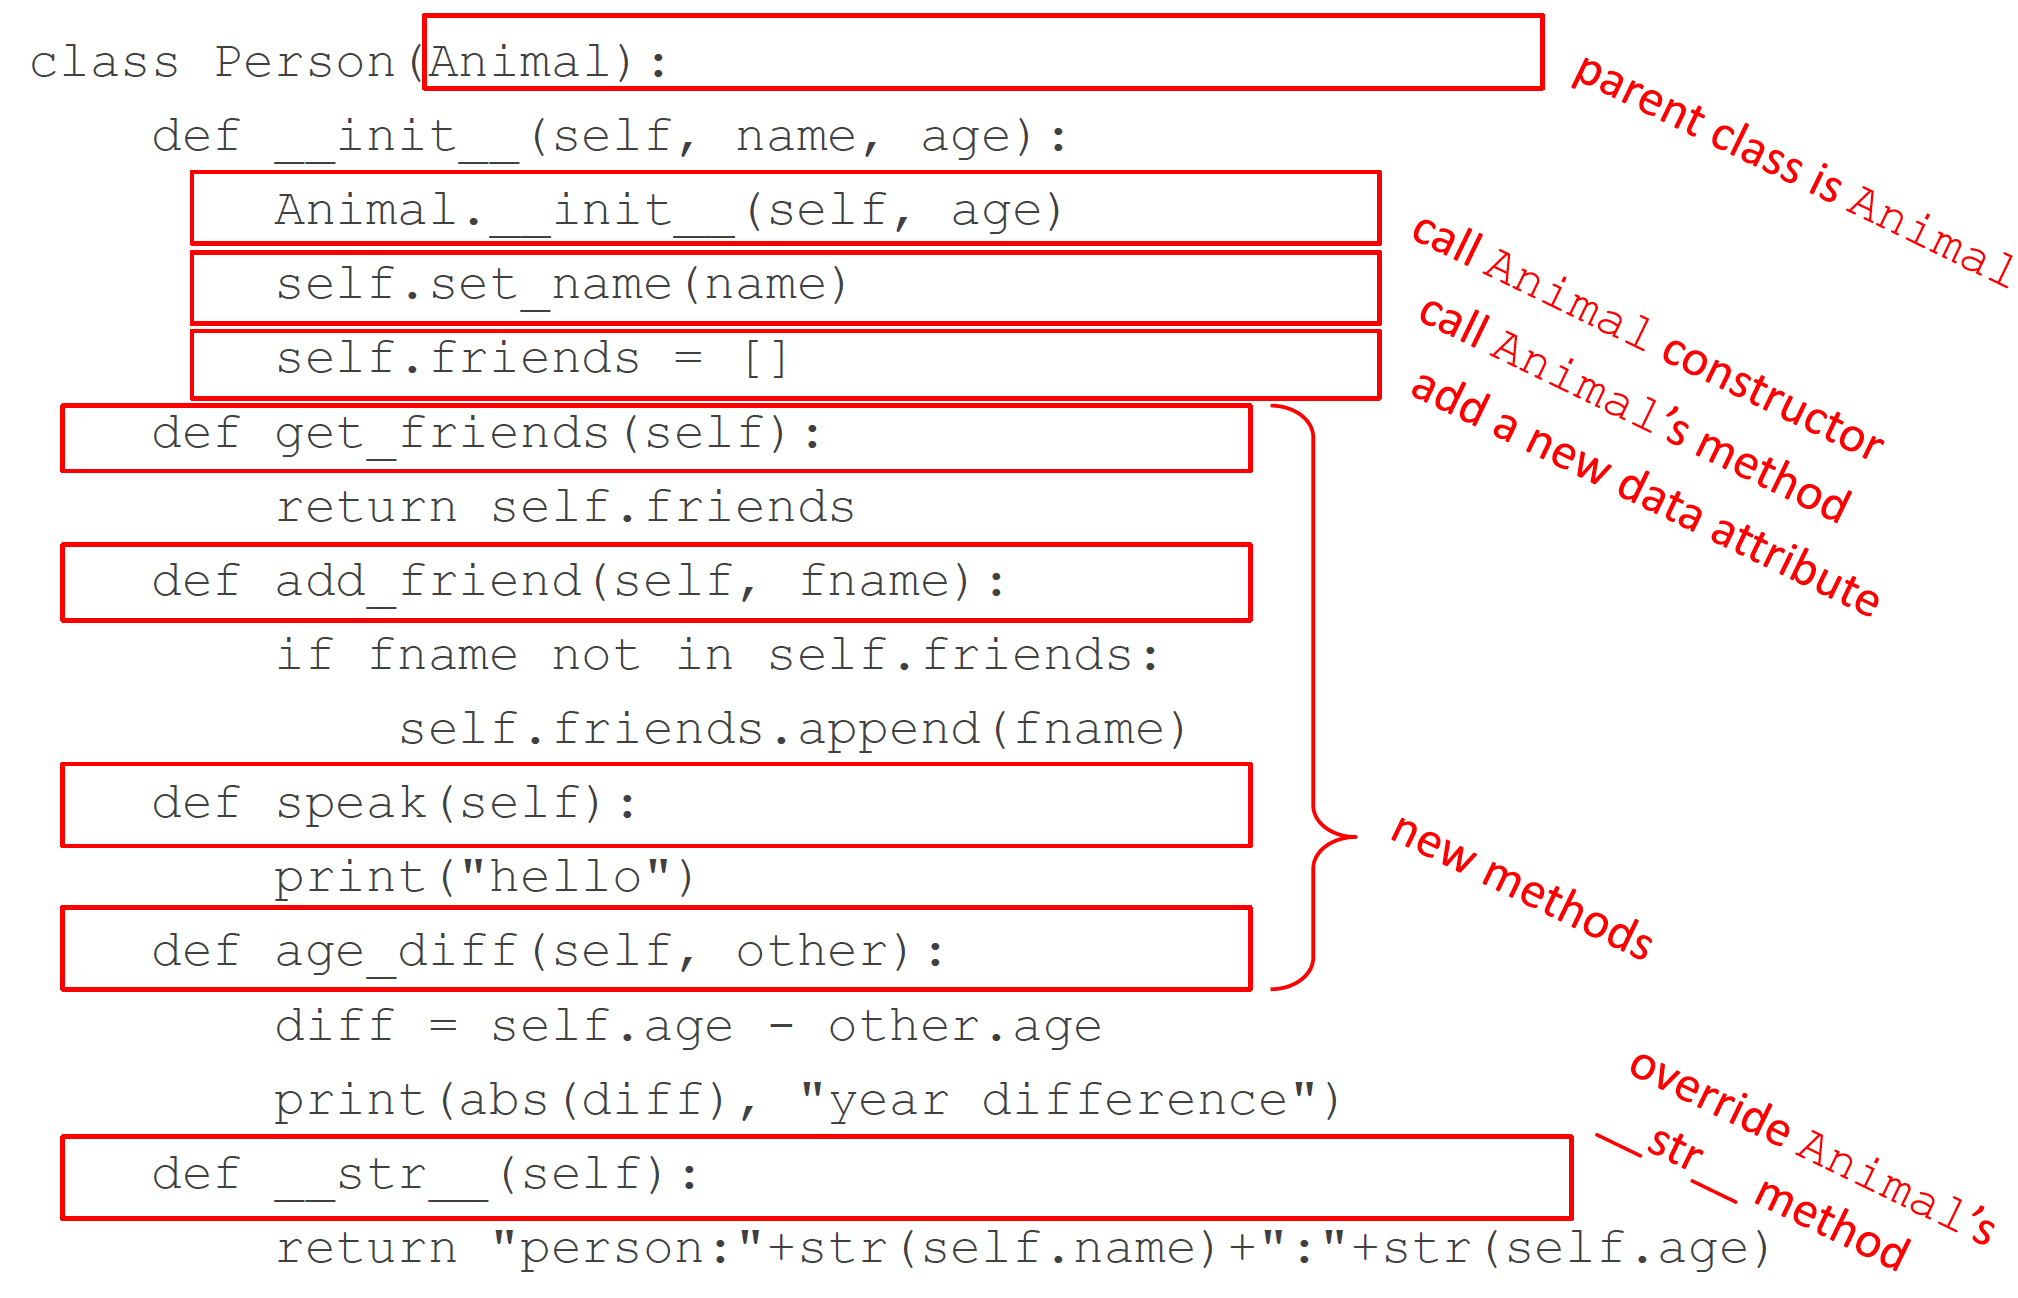

In [39]:
print("---- person checks ----")
p1 = Person("Turing", 55)
p2 = Person("Lovelace", 43)
print(p1.get_name())
print(p1.get_age())
print(p2.get_name())
print(p2.get_age())
print(p1)
p1.speak()
p1.age_diff(p2)

---- person checks ----
Turing
55
Lovelace
43
person:Turing:55
hello
12 year difference


## Student class below:

In [41]:
import random
class Student(Person):
    def __init__(self, name, age, major=None):
        Person.__init__(self, name, age)
        self.major= major
    def change_major(self, major):
        self.major= major
    def speak(self):
        r = random.random() # generate floats between 0 and 1
        if r < 0.25:
            print("i have homework")
        elif 0.25 <= r < 0.5:
            print("in need sleep")
        elif 0.5 <= r < 0.75:
            print("i should eat")
        else:
            print("i am watching tv")
    def __str__(self):
        return "student:"+str(self.name)+":"+str(self.age)+":"+str(self.major)

In [42]:
print("---- student tests ----")
s1 = Student('alice', 20, "CS")
s2 = Student('beth', 18)
print(s1)
print(s2)
print(s1.get_name(),"says:", end=" ")
s1.speak()
print(s2.get_name(),"says:", end=" ")
s2.speak()

---- student tests ----
student:alice:20:CS
student:beth:18:None
alice says: i should eat
beth says: i should eat


## Class Variables
- class variables and their values are shared between all instances of a class
- e.g., <b>tag</b> used to give unique id to each new rabbit instance


In [32]:
class Rabbit(Animal):
    # a class variable, tag, shared across all instances
    tag = 1
    def __init__(self, age, parent1=None, parent2=None):
        Animal.__init__(self, age)
        self.parent1 = parent1
        self.parent2 = parent2
        self.rid = Rabbit.tag
        Rabbit.tag += 1
    def get_rid(self):
        # zfill used to add leading zeroes 001 instead of 1
        return str(self.rid).zfill(3)
    def get_parent1(self):
        return self.parent1
    def get_parent2(self):
        return self.parent2
    def __add__(self, other):
        # returning object of same type as this class
        return Rabbit(0, self, other)
    def __eq__(self, other):
        # compare the ids of self and other's parents
        # don't care about the order of the parents
        # the backslash tells python I want to break up my line
        parents_same = self.parent1.rid == other.parent1.rid \
                       and self.parent2.rid == other.parent2.rid
        parents_opposite = self.parent2.rid == other.parent1.rid \
                           and self.parent1.rid == other.parent2.rid
        return parents_same or parents_opposite
    def __str__(self):
        return "rabbit:"+ self.get_rid()

In [33]:
print("---- rabbit tests ----")
print("---- testing creating rabbits ----")
r1 = Rabbit(3)
r2 = Rabbit(4)
r3 = Rabbit(5)
print("r1:", r1)
print("r2:", r2)
print("r3:", r3)
print("r1 parent1:", r1.get_parent1())
print("r1 parent2:", r1.get_parent2())

print("---- testing rabbit addition ----")
r4 = r1+r2   # r1.__add__(r2)
print("r1:", r1)
print("r2:", r2)
print("r4:", r4)
print("r4 parent1:", r4.get_parent1())
print("r4 parent2:", r4.get_parent2())

print("---- testing rabbit equality ----")
r5 = r3+r4
r6 = r4+r3
print("r3:", r3)
print("r4:", r4)
print("r5:", r5)
print("r6:", r6)
print("r5 parent1:", r5.get_parent1())
print("r5 parent2:", r5.get_parent2())
print("r6 parent1:", r6.get_parent1())
print("r6 parent2:", r6.get_parent2())
print("r5 and r6 have same parents?", r5 == r6)
print("r4 and r6 have same parents?", r4 == r6)

---- rabbit tests ----
---- testing creating rabbits ----
r1: rabbit:001
r2: rabbit:002
r3: rabbit:003
r1 parent1: None
r1 parent2: None
---- testing rabbit addition ----
r1: rabbit:001
r2: rabbit:002
r4: rabbit:004
r4 parent1: rabbit:001
r4 parent2: rabbit:002
---- testing rabbit equality ----
r3: rabbit:003
r4: rabbit:004
r5: rabbit:005
r6: rabbit:006
r5 parent1: rabbit:003
r5 parent2: rabbit:004
r6 parent1: rabbit:004
r6 parent2: rabbit:003
r5 and r6 have same parents? True
r4 and r6 have same parents? False


## some notes on the  special method __eq__()
- compare ids of parents since ids are unique (due to class var)
- note you can’t compare objects directly
- with self.parent1 == other.parent1
    - this calls the __eq__method over and over until call it on None and gives an AttributeError when it tries to do None.parent1

## Summary
### What we know so far:
- OOP:
    - enables us to create our own collections of data
    - let's us organize information
    - do a logical division of work
    - access information in a consistent manner
    - add layers of complexity
    - like functions, classes are a mechanism for decomposition and abstraction in programming